In [2]:
import numpy as np
import matplotlib.pyplot as plt

from typing import List, Tuple
from collections.abc import Callable

Matplotlib is building the font cache; this may take a moment.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9889487222017809..0.9998639428395761].


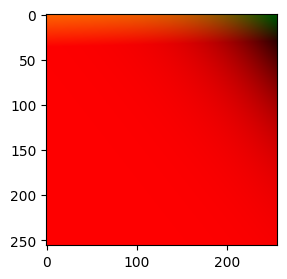

In [107]:
def CPPN(x: np.ndarray, y: np.ndarray, w: np.ndarray, b: np.ndarray, f: Callable[[np.ndarray], np.ndarray]) -> np.ndarray:
    """
    Compositional Pattern Producing Network (CPPN) function. 
    x: np.ndarray: x-coordinate.
    y: np.ndarray: y-coordinate.
    w: np.ndarray: weights. If weights are zero, the function will return 0 (thus, no connection between nodes).
    b: np.ndarray: biases.
    f: Callable[[np.ndarray], np.ndarray]: activation function.
    """
    return f(np.dot(w, np.array([x, y, 1]).T) + b)

img = np.zeros((256, 256, 3))
x = np.linspace(-1, 1, 256)
y = np.linspace(-1, 1, 256)

# Weights and biases
w1 = np.random.randn(3)
b1 = np.random.randn(1)
w2 = np.random.randn(3)
b2 = np.random.randn(1)

# Activation function
f = lambda x: np.tanh(x)

for i in range(256):
    for j in range(256):
        r = CPPN(x[i], y[j], w1, b1, f)
        g = CPPN(x[i], y[j], w2, b2, f)
        b = np.array([0])
        img[i, j] = np.concatenate([r, g, b], axis=0)

fig, ax = plt.subplots(figsize=(3, 3))
plt.imshow(img)
plt.show()

In [ ]:
N = 10
W1 = np.random.randn(N,  3)
W2 = np.random.randn(N,  3)

Generating pattern with NumPy-based CPPN...
Pattern generated. Displaying...


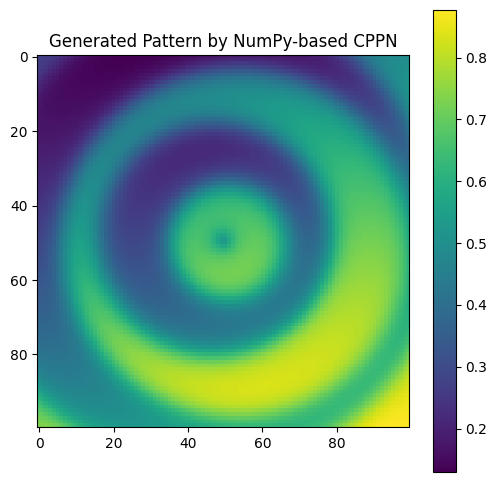

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 活性化関数の定義
def sine(x):
    return np.sin(x)

def tanh(x):
    return np.tanh(x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# CPPNの関数
def cppn(x, y):
    # 入力座標
    r = np.sqrt(x**2 + y**2)  # 中心からの距離
    
    # 層の定義
    h1 = sine(10 * r)  # 第一層: sin関数
    h2 = tanh(h1 + x)  # 第二層: tanh関数
    h3 = sigmoid(h2 + y)  # 第三層: sigmoid関数
    
    # 出力
    return h3

# 2D空間の座標を生成
def generate_coordinates(size):
    x = np.linspace(-1, 1, size)
    y = np.linspace(-1, 1, size)
    xv, yv = np.meshgrid(x, y)
    return xv, yv

# パターンを生成
def generate_pattern(size):
    xv, yv = generate_coordinates(size)
    pattern = cppn(xv, yv)
    return pattern

# 実行部分
if __name__ == "__main__":
    # 画像サイズ（解像度）
    size = 100  # 100x100ピクセルの画像を生成
    
    # パターン生成
    print("Generating pattern with NumPy-based CPPN...")
    pattern = generate_pattern(size)
    
    # 結果を表示
    print("Pattern generated. Displaying...")
    plt.figure(figsize=(6, 6))
    plt.imshow(pattern, cmap="viridis")
    plt.colorbar()
    plt.title("Generated Pattern by NumPy-based CPPN")
    plt.show()

In [7]:
import networkx as nx

def is_dag(edge_list):
    """エッジリストからDAGかどうかを判定"""
    graph = nx.DiGraph()  # 有向グラフを作成
    graph.add_edges_from(edge_list)  # エッジを追加
    return nx.is_directed_acyclic_graph(graph)  # DAGかどうかをチェック

# エッジリストの例
edge_list = [(0, 1), (1, 2), (2, 3)]  # DAG
print(is_dag(edge_list))  # True

edge_list_with_cycle = [(0, 1), (1, 2), (2, 0)]  # サイクルあり
print(is_dag(edge_list_with_cycle))  # False


True
False


0 -> 1
1 -> 2
2 -> 3
3 -> 4
4 -> 5
5 -> 6
6 -> 7
7 -> 8
8 -> 9


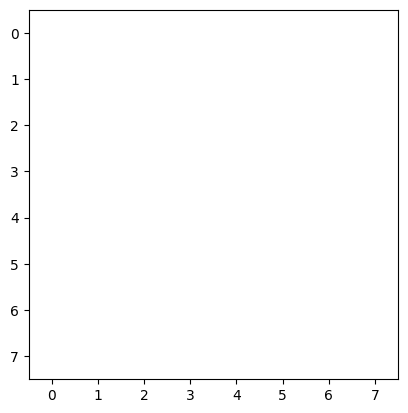

In [82]:
class Node():
    def __init__(self, id, act_f):
        self.id: int = id
        self.w: float = np.random.uniform(-1, 1, 3)
        self.b: float = np.random.uniform(-1, 1, 3)
        self.act_f: Callable = None
        self.v: float = np.ones(3)

        self.assign_activation(act_f)
    
    def assign_activation(self, act_f) -> Callable:
        self.act_f = act_f
    
    def call(self):
        return self.act_f(np.dot(self.w, self.v.T) + self.b)

to_node = {}

N_INIT = 10
N_INIT_EDGE = 5
node_id_list: List[int] = np.arange(0, N_INIT)
node_dict = {}
act_f = lambda x: np.tanh(x)

for i in node_id_list:
    node_dict[i] = Node(id=i, act_f=act_f)

# for i in range(N_INIT_EDGE):
#     nd_ids = np.sort(np.random.choice(node_id_list, 2, replace=False))
#     to_node[nd_ids[0]] = nd_ids[1]

for i in range(len(node_id_list)-1):
    to_node[node_id_list[i]] = node_id_list[i+1]

for k, v in to_node.items():
    print(k, "->", v)

tmp_list = []
for k in to_node.keys():
    tmp_list.append(k)

H, W, C = 8, 8, 3
img = np.ones((H, W, C))
x_space = np.linspace(0, 1, H)
y_space = np.linspace(0, 1, W)
plt.imshow(img)
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7086698000789643..-0.04191090005559894].


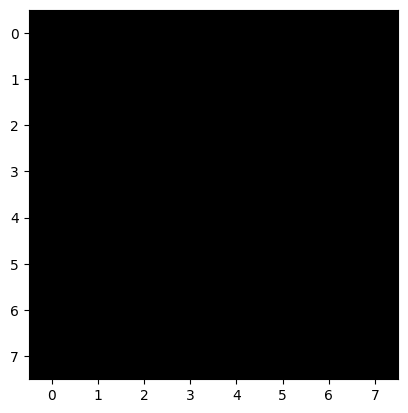

In [85]:
for x_i in np.arange(H):
    for y_i in np.arange(W):
        x, y = x_space[x_i], y_space[y_i]
        i = np.min(tmp_list)
        v = np.array([x, y, 1])
        while True:
            node_dict[i].v = v
            v = node_dict[i].call()
            if to_node.get(i):
                i = to_node[i]
            else:
                break
        img[x_i, y_i] = v
plt.imshow(img)
plt.show()